In [1]:
from helper import *
!pip install plotly
%matplotlib inline

In [2]:
df = pd.read_csv('final_table.csv').drop(columns=['Unnamed: 0', 'song_id'])

In [3]:
df['playlist_names'] = df['playlist_names'].fillna(0)

In [4]:
# splitting data into data with playlists and without data

df_playlists = df[df['playlist_names'] != 0] 
 
df = df[df['playlist_names'] == 0] 

In [5]:
df_playlists = df_playlists.reset_index().drop(columns='index')

### Categorizing Moods for the Playlists

In [6]:
df_playlists

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_datetime,release_year,playlist_names
0,4fHDlIntTsRGSyTg5UYZYC,Banana Boat (Day-O),64.0,183133,0.0,Harry Belafonte,['6Tw1ktF4xMmzaLLbe98I2z'],0.797,0.105,1,-16.881,1,0.0969,0.88500,0.000116,0.1080,0.419,122.545,4,1956-01-01,1956,['happy_31']
1,64Ny7djQ6rNJspquof2KoX,Hound Dog,69.0,136027,0.0,Elvis Presley,['43ZHCT0cAZBISjO8DG9PnE'],0.357,0.756,0,-8.492,1,0.0621,0.73300,0.005050,0.7600,0.950,174.797,4,1958-03-21,1958,['happy_31']
2,0SsYlkXxZ5vkWOTsKxMfMz,Lonesome Town,67.0,134040,0.0,Ricky Nelson,['73sSFVlM6pkweLXE8qw1OS'],0.404,0.193,11,-12.501,1,0.0305,0.79400,0.000296,0.1030,0.273,77.026,4,1959-01-01,1959,['sad_43']
3,2ZNTPtYmAhN9vCwnAgqKn1,"Shout, Pts. 1 & 2",63.0,268560,0.0,The Isley Brothers,['53QzNeFpzAaXYnrDBbDrIp'],0.489,0.866,10,-7.433,1,0.0933,0.75300,0.000000,0.8760,0.416,138.630,4,1959-08-21,1959,['happy_25']
4,2yOXKIU9YtBSWjI3OA8tqj,Little Bitty Pretty One,57.0,143067,0.0,Thurston Harris,['61VpPyyJn2bitby8tbafzT'],0.706,0.883,8,1.085,1,0.2400,0.77700,0.000002,0.0562,0.887,88.351,4,1959-03-10,1959,['happy_11']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611,54SvbpFPrwWucUVKSFRdW7,Without Me,54.0,199412,1.0,['Wind Walkers'],0,0.599,0.764,4,-4.814,1,0.0287,0.00844,0.000091,0.1760,0.346,135.902,4,2018-10-24,2018,['angry_38']
8612,0VZ9xPNa6ROafP6GYYuv2S,Marry Me,0.0,205453,0.0,['Train'],0,0.366,0.269,0,-8.456,1,0.0287,0.82900,0.000017,0.1080,0.492,86.577,4,2009-01-01,2009,"['happy_42', 'happy_41']"
8613,0Sb0ORaZZKh8wWGuC4I5iO,Escape,36.0,133224,0.0,['Moonkids'],0,0.732,0.645,11,-9.685,1,0.0399,0.00201,0.705000,0.0868,0.556,119.010,4,2021-02-19,2021,['happy_16']
8614,0McwacDD6qFvYloGT6DyjJ,Photogenic,21.0,217778,0.0,['Hobbie Stuart'],0,0.764,0.595,0,-8.156,1,0.0625,0.70900,0.000054,0.1510,0.489,134.921,4,2017-09-03,2017,['happy_34']


In [7]:
## counting number of mood playlists

df_playlists['happy'] = df_playlists['playlist_names'].apply(lambda x: x.count('happy'))
df_playlists['sad'] = df_playlists['playlist_names'].apply(lambda x: x.count('sad'))
df_playlists['angry'] = df_playlists['playlist_names'].apply(lambda x: x.count('angry'))

In [8]:
df_playlists.head(100)

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_datetime,release_year,playlist_names,happy,sad,angry
0,4fHDlIntTsRGSyTg5UYZYC,Banana Boat (Day-O),64.0,183133,0.0,Harry Belafonte,['6Tw1ktF4xMmzaLLbe98I2z'],0.797,0.105,1,-16.881,1,0.0969,0.88500,0.000116,0.1080,0.419,122.545,4,1956-01-01,1956,['happy_31'],1,0,0
1,64Ny7djQ6rNJspquof2KoX,Hound Dog,69.0,136027,0.0,Elvis Presley,['43ZHCT0cAZBISjO8DG9PnE'],0.357,0.756,0,-8.492,1,0.0621,0.73300,0.005050,0.7600,0.950,174.797,4,1958-03-21,1958,['happy_31'],1,0,0
2,0SsYlkXxZ5vkWOTsKxMfMz,Lonesome Town,67.0,134040,0.0,Ricky Nelson,['73sSFVlM6pkweLXE8qw1OS'],0.404,0.193,11,-12.501,1,0.0305,0.79400,0.000296,0.1030,0.273,77.026,4,1959-01-01,1959,['sad_43'],0,1,0
3,2ZNTPtYmAhN9vCwnAgqKn1,"Shout, Pts. 1 & 2",63.0,268560,0.0,The Isley Brothers,['53QzNeFpzAaXYnrDBbDrIp'],0.489,0.866,10,-7.433,1,0.0933,0.75300,0.000000,0.8760,0.416,138.630,4,1959-08-21,1959,['happy_25'],1,0,0
4,2yOXKIU9YtBSWjI3OA8tqj,Little Bitty Pretty One,57.0,143067,0.0,Thurston Harris,['61VpPyyJn2bitby8tbafzT'],0.706,0.883,8,1.085,1,0.2400,0.77700,0.000002,0.0562,0.887,88.351,4,1959-03-10,1959,['happy_11'],1,0,0
5,44AyOl4qVkzS48vBsbNXaC,Can't Help Falling in Love,79.0,182360,0.0,Elvis Presley,['43ZHCT0cAZBISjO8DG9PnE'],0.396,0.293,2,-14.062,1,0.0275,0.94100,0.000196,0.1050,0.343,100.307,3,1961-10-20,1961,"['happy_21', 'sad_22']",1,1,0
6,3SdTKo2uVsxFblQjpScoHy,Stand by Me,79.0,180056,0.0,Ben E. King,['3plJVWt88EqjvtuB4ZDRV3'],0.650,0.306,9,-9.443,1,0.0393,0.57000,0.000007,0.0707,0.605,118.068,4,1962-08-20,1962,['happy_21'],1,0,0
7,7FS541dJh3iQAEXEZoDhE6,Twistin' the Night Away,64.0,159853,0.0,Sam Cooke,['6hnWRPzGGKiapVX1UCdEAC'],0.458,0.801,9,-7.830,1,0.0565,0.69100,0.000000,0.3280,0.930,160.547,4,1962-04-01,1962,['happy_2'],1,0,0
8,5ZBeML7Lf3FMEVviTyvi8l,Twist And Shout - Remastered 2009,75.0,155227,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.482,0.849,2,-9.198,1,0.0452,0.64100,0.000008,0.0414,0.937,124.631,4,1963-03-22,1963,"['happy_47', 'happy_40', 'happy_31']",3,0,0
9,3VbGCXWRiouAq8VyMYN2MI,Love Me Do - Remastered 2009,69.0,141693,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.520,0.829,0,-6.228,1,0.0806,0.38600,0.000062,0.2270,0.744,147.997,4,1963-03-22,1963,['happy_31'],1,0,0


#### Adding a mood column

In [9]:
## subset the data to just ones that have more than one playlist
df_playlists_model_set = df_playlists[(df_playlists.happy > 1) | (df_playlists.angry > 1) | (df_playlists.sad > 1)]

In [10]:
df_playlists_model_set


,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_datetime,release_year,playlist_names,happy,sad,angry
8,5ZBeML7Lf3FMEVviTyvi8l,Twist And Shout - Remastered 2009,75.0,155227,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.482,0.849,2,-9.198,1,0.0452,0.6410,0.000008,0.0414,0.937,124.631,4,1963-03-22,1963,"['happy_47', 'happy_40', 'happy_31']",3,0,0
17,45s88Xopo6KvHc0PQ05aGg,My Generation - Mono Version,60.0,198867,0.0,The Who,['67ea9eGLXYMsO2eYQRui3w'],0.299,0.787,0,-7.930,0,0.0690,0.1400,0.000000,0.2920,0.716,94.798,4,1966-04-01,1966,"['happy_39', 'happy_31']",2,0,0
18,7tqhbajSfrz2F7E1Z75ASX,Ain't No Mountain High Enough,82.0,151667,0.0,"Marvin Gaye, Tammi Terrell","['3koiLjNrgRTNbOwViDipeA', '75jNCko3SnEMI5gwGqrbb8']",0.663,0.600,7,-10.870,1,0.0320,0.4300,0.000000,0.1840,0.800,129.991,4,1967-08-29,1967,"['happy_28', 'happy_25']",2,0,0
19,3yrSvpt2l1xhsV9Em88Pul,Brown Eyed Girl,80.0,183307,0.0,Van Morrison,['44NX2ffIYHr6D4n7RaZF7A'],0.491,0.583,7,-10.964,1,0.0376,0.1820,0.000000,0.4070,0.907,150.572,4,1967-09-01,1967,"['happy_29', 'happy_21']",2,0,0
26,6dGnYIeXmHdcikdzNNDMm2,Here Comes The Sun - Remastered 2009,83.0,185733,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.557,0.540,9,-10.484,1,0.0347,0.0339,0.002480,0.1790,0.394,129.171,4,1969-09-26,1969,"['happy_41', 'happy_40', 'happy_32', 'happy_20', 'happy_15']",5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8558,2U8tH2LXMh5EQvI6oBhSHJ,Are You Okay?,61.0,220396,1.0,"['Thomas Reid', 'Rxseboy', 'Powfu']",0,0.798,0.613,6,-9.037,1,0.2040,0.3630,0.000000,0.7620,0.229,97.013,4,2020-01-30,2020,"['sad_26', 'sad_12', 'sad_12']",0,3,0
8560,7im3jaJBEYivH5JKXMh1Yy,Value,57.0,167158,1.0,['A$AP Ferg'],0,0.766,0.901,1,-2.764,1,0.1280,0.1040,0.000007,0.0924,0.215,129.993,4,2020-01-29,2020,"['angry_33', 'angry_18']",0,0,2
8566,1NyFRrFiJAJIaR6icj1goI,Skinny Love,15.0,238533,0.0,['Bon Iver'],0,0.592,0.256,4,-14.031,0,0.0449,0.8420,0.000002,0.0880,0.103,76.361,4,2008-05-12,2008,"['sad_37', 'sad_18']",0,2,0
8567,63lUB0rs6KK58vj8mEAfdj,Momma Always Told Me (feat. Stanaj & Yung Bae),59.0,181335,1.0,"['Mike Posner', 'Stanaj', 'Yung Bae']",0,0.766,0.533,9,-5.758,0,0.0506,0.0300,0.000000,0.0667,0.764,107.999,4,2021-01-28,2021,"['happy_18', 'happy_1']",2,0,0


In [11]:
df_playlists_model_set['mood'] = df_playlists_model_set[['angry','sad','happy']].idxmax(axis=1)

In [12]:
df_playlists_model_set = df_playlists_model_set.reset_index().drop(columns='index')

In [13]:
df_playlists_model_set.mood.value_counts()

happy    724
sad      648
angry    564
Name: mood, dtype: int64

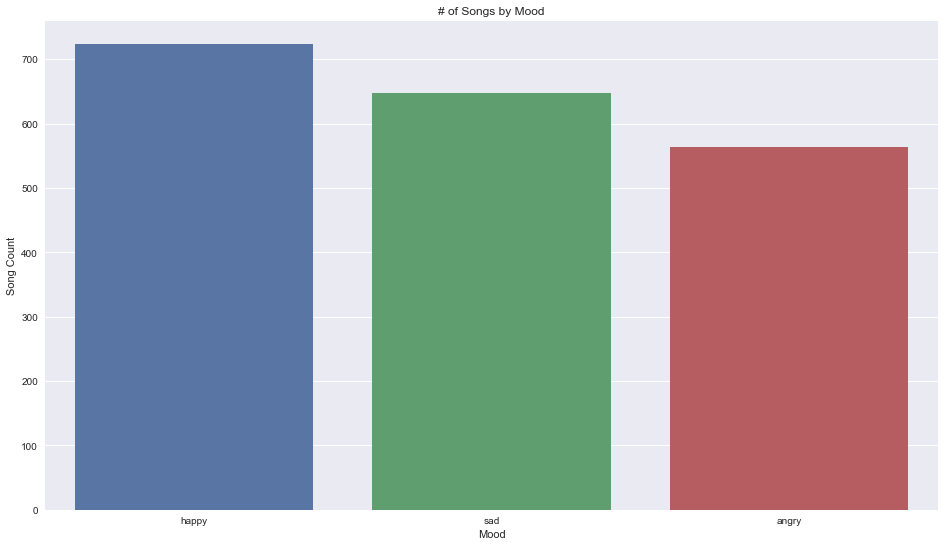

In [14]:
#number of songs per mood

fig, ax = plt.subplots(figsize=(16,9))
sns.barplot(x=df_playlists_model_set.mood.value_counts().index, y=df_playlists_model_set.mood.value_counts().values);
ax.set_ylabel('Song Count')
ax.set_xlabel('Mood')
ax.set_title('# of Songs by Mood');

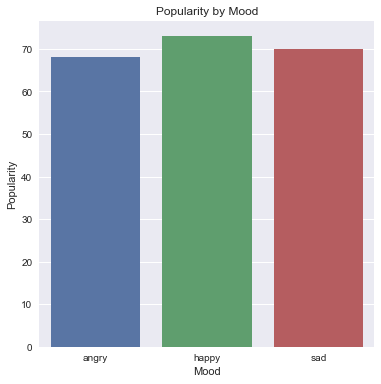

In [15]:
## Median of popularity for each genre
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x=df_playlists_model_set.groupby('mood')['popularity'].median().index, y=df_playlists_model_set.groupby('mood')['popularity'].median().values);
ax.set_ylabel("Popularity")
ax.set_xlabel("Mood")
ax.set_title('Popularity by Mood');

### Scaling Data

In [16]:
ss = StandardScaler()


df_playlists_model_set[['duration_ms', 'popularity', 'loudness', 'tempo']] = ss.fit_transform(df_playlists_model_set[['duration_ms', 'popularity', 'loudness', 'tempo']])

In [17]:
df_playlists_model_set

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_datetime,release_year,playlist_names,happy,sad,angry,mood
0,5ZBeML7Lf3FMEVviTyvi8l,Twist And Shout - Remastered 2009,0.538665,-1.283978,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.482,0.849,2,-0.716862,1,0.0452,0.6410,0.000008,0.0414,0.937,0.178076,4,1963-03-22,1963,"['happy_47', 'happy_40', 'happy_31']",3,0,0,happy
1,45s88Xopo6KvHc0PQ05aGg,My Generation - Mono Version,-0.085725,-0.270455,0.0,The Who,['67ea9eGLXYMsO2eYQRui3w'],0.299,0.787,0,-0.334720,0,0.0690,0.1400,0.000000,0.2920,0.716,-0.930198,4,1966-04-01,1966,"['happy_39', 'happy_31']",2,0,0,happy
2,7tqhbajSfrz2F7E1Z75ASX,Ain't No Mountain High Enough,0.830047,-1.366657,0.0,"Marvin Gaye, Tammi Terrell","['3koiLjNrgRTNbOwViDipeA', '75jNCko3SnEMI5gwGqrbb8']",0.663,0.600,7,-1.220759,1,0.0320,0.4300,0.000000,0.1840,0.800,0.377196,4,1967-08-29,1967,"['happy_28', 'happy_25']",2,0,0,happy
3,3yrSvpt2l1xhsV9Em88Pul,Brown Eyed Girl,0.746795,-0.631830,0.0,Van Morrison,['44NX2ffIYHr6D4n7RaZF7A'],0.491,0.583,7,-1.249088,1,0.0376,0.1820,0.000000,0.4070,0.907,1.141765,4,1967-09-01,1967,"['happy_29', 'happy_21']",2,0,0,happy
4,6dGnYIeXmHdcikdzNNDMm2,Here Comes The Sun - Remastered 2009,0.871673,-0.575487,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.557,0.540,9,-1.104429,1,0.0347,0.0339,0.002480,0.1790,0.394,0.346733,4,1969-09-26,1969,"['happy_41', 'happy_40', 'happy_32', 'happy_20', 'happy_15']",5,0,0,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,2U8tH2LXMh5EQvI6oBhSHJ,Are You Okay?,-0.044099,0.229548,1.0,"['Thomas Reid', 'Rxseboy', 'Powfu']",0,0.798,0.613,6,-0.668341,1,0.2040,0.3630,0.000000,0.7620,0.229,-0.847913,4,2020-01-30,2020,"['sad_26', 'sad_12', 'sad_12']",0,3,0,sad
1932,7im3jaJBEYivH5JKXMh1Yy,Value,-0.210603,-1.006885,1.0,['A$AP Ferg'],0,0.766,0.901,1,1.222176,1,0.1280,0.1040,0.000007,0.0924,0.215,0.377270,4,2020-01-29,2020,"['angry_33', 'angry_18']",0,0,2,angry
1933,1NyFRrFiJAJIaR6icj1goI,Skinny Love,-1.958894,0.650773,0.0,['Bon Iver'],0,0.592,0.256,4,-2.173401,0,0.0449,0.8420,0.000002,0.0880,0.103,-1.615119,4,2008-05-12,2008,"['sad_37', 'sad_18']",0,2,0,sad
1934,63lUB0rs6KK58vj8mEAfdj,Momma Always Told Me (feat. Stanaj & Yung Bae),-0.127351,-0.677629,1.0,"['Mike Posner', 'Stanaj', 'Yung Bae']",0,0.766,0.533,9,0.319863,0,0.0506,0.0300,0.000000,0.0667,0.764,-0.439791,4,2021-01-28,2021,"['happy_18', 'happy_1']",2,0,0,happy


### Dummy Data

In [18]:
explicit = pd.get_dummies(df_playlists_model_set['explicit'], prefix='explicit')

df_playlists_model_set = pd.concat([df_playlists_model_set, explicit], axis=1)

In [19]:
mode = pd.get_dummies(df_playlists_model_set['mode'], prefix='mode')

df_playlists_model_set = pd.concat([df_playlists_model_set, mode], axis=1)

In [20]:
key = pd.get_dummies(df_playlists_model_set['key'], prefix='key')

df_playlists_model_set = pd.concat([df_playlists_model_set, key], axis=1)

In [21]:
time_sig = pd.get_dummies(df_playlists_model_set['time_signature'], prefix='time_sig')

df_playlists_model_set = pd.concat([df_playlists_model_set, time_sig], axis=1)

In [22]:
df_playlists_model_set.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'release_datetime',
       'release_year', 'playlist_names', 'happy', 'sad', 'angry', 'mood',
       'explicit_0.0', 'explicit_1.0', 'mode_0', 'mode_1', 'key_0', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9',
       'key_10', 'key_11', 'time_sig_1', 'time_sig_3', 'time_sig_4',
       'time_sig_5'],
      dtype='object')

### Correlation Graph

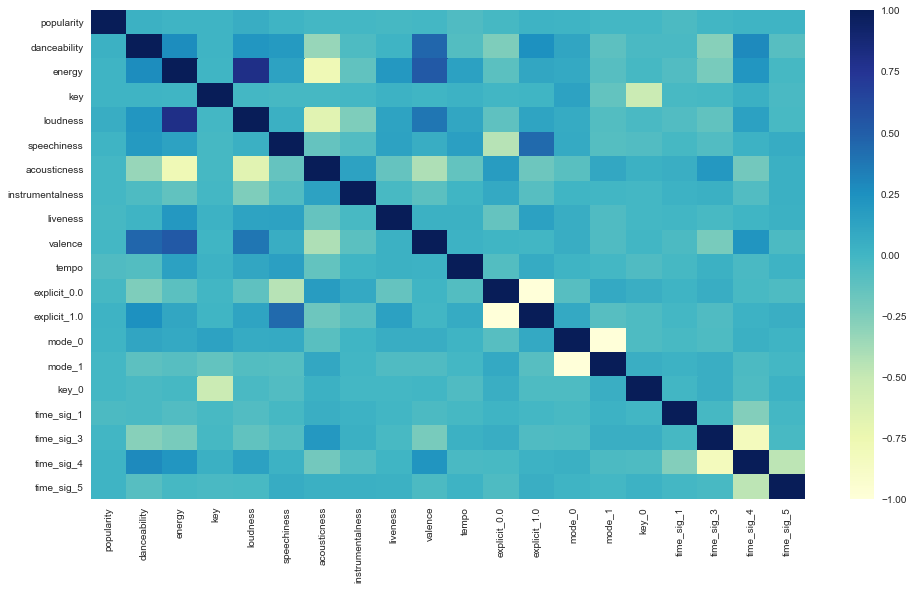

In [23]:
fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(df_playlists_model_set.drop(columns=['explicit', 'mode', 'happy','sad','angry','playlist_names', 'release_year', 'release_datetime','duration_ms','key_1','key_2','key_3','key_4','key_5','key_6','key_7','key_8','key_9','key_10','key_11', 'time_signature']).corr(),cmap="YlGnBu");

### Cleaning up final table for training

In [24]:
X = df_playlists_model_set.drop(columns=['id', 'name', 'explicit', 'artists', 'id_artists', 'key', 'mode', 'time_signature', 'release_datetime', 'release_year', 'playlist_names', 'happy', 'sad', 'angry', 'mood'])

In [25]:
y = df_playlists_model_set['mood']

In [26]:
y

0       happy
1       happy
2       happy
3       happy
4       happy
        ...  
1931      sad
1932    angry
1933      sad
1934    happy
1935    happy
Name: mood, Length: 1936, dtype: object

### Model 1 - Random Forest

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [28]:
rfc = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=1000, class_weight='balanced')

In [29]:
params_grid = {
    'criterion' : ['gini','entropy'],
    'max_depth':[None, 5,3],
    'min_samples_split':[2,10,20],
    'n_estimators': [100,1000,5000]
}
gridsearch_model = GridSearchCV(estimator=rfc,param_grid = params_grid,verbose=1,n_jobs=-1)

In [30]:
gridsearch_model.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=1000, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 3],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [100, 1000, 5000]},
             verbose=1)

In [31]:
best_model_rf = gridsearch_model.best_estimator_

In [32]:
gridsearch_model.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_split': 2,
 'n_estimators': 5000}

In [33]:
best_model_rf

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=5000, n_jobs=-1, random_state=42)

In [34]:
y_pred_rf = best_model_rf.predict(X_test)

In [35]:
y_preds_rf = pd.Series(y_pred_rf)

In [36]:
f1_score(y_preds_rf,y_test,average='weighted')

0.8126000378657015

In [62]:
cf_matrix = confusion_matrix(y_test, y_preds_rf)

In [69]:
y_preds_rf.value_counts()

happy    214
sad      139
angry    131
dtype: int64

In [70]:
y_test.value_counts()

happy    177
angry    160
sad      147
Name: mood, dtype: int64

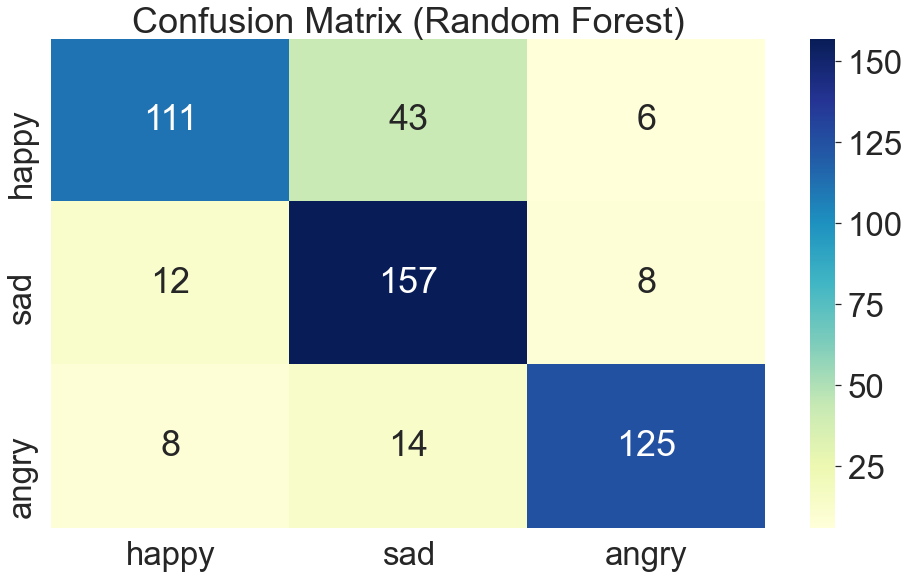

In [71]:
fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(cf_matrix, annot=True, cmap="YlGnBu", fmt='g', 
            xticklabels=['happy', 'sad', 'angry'], 
            yticklabels=['happy', 'sad', 'angry'])
sns.set(font_scale=3)
ax.set_title('Confusion Matrix (Random Forest)');

### Model 2 - KNN 

In [37]:
knn = KNeighborsClassifier(n_jobs=-1)

In [38]:
params_grid = {
    'n_neighbors':[3,5,11,19],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}
gridsearch_model = GridSearchCV(estimator=knn,param_grid = params_grid,verbose=1,cv=3, n_jobs=-1)

In [39]:
gridsearch_model.fit(X_train,y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [40]:
best_model_knn = gridsearch_model.best_estimator_


In [41]:
gridsearch_model.best_params_


{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

In [42]:
best_model_knn


KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=19,
                     weights='distance')

In [43]:
y_pred_knn = best_model_knn.predict(X_test)


In [44]:
y_preds_knn = pd.Series(y_pred_knn)


In [45]:
f1_score(y_preds_knn,y_test,average='weighted')


0.7533828659011684

In [72]:
cf_matrix_knn = confusion_matrix(y_test, y_preds_knn)

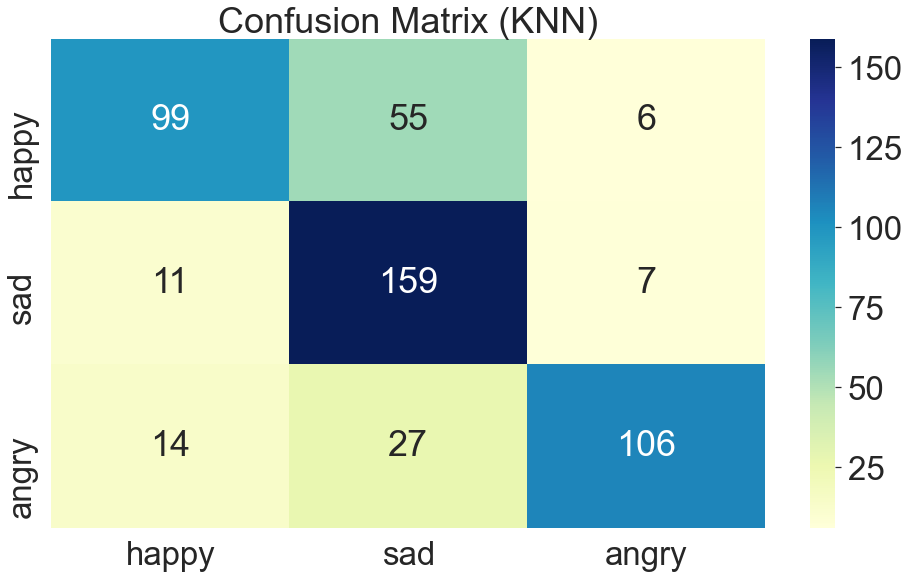

In [74]:
fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(cf_matrix_knn, annot=True, cmap="YlGnBu", fmt='g', 
            xticklabels=['happy', 'sad', 'angry'], 
            yticklabels=['happy', 'sad', 'angry'])
sns.set(font_scale=3)
ax.set_title('Confusion Matrix (KNN)');

### Predictions

#### Adding Dummy Data & Scaling Data

In [46]:
df[['duration_ms', 'popularity', 'loudness', 'tempo']] = ss.fit_transform(df[['duration_ms', 'popularity', 'loudness', 'tempo']])

In [47]:
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_datetime,release_year,playlist_names
0,35iwgR4jXetI318WEWsa1Q,Carve,-1.177038,-0.813545,0.0,Uli,['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-0.610157,1,0.4510,0.674,0.744000,0.1510,0.127,-0.456599,3,1922-02-22,1922,0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,-1.508869,-1.039750,0.0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-2.338143,1,0.9570,0.797,0.000000,0.1480,0.655,-0.552045,1,1922-06-01,1922,0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,-1.508869,-0.382168,0.0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-2.150378,1,0.0512,0.994,0.021800,0.2120,0.457,0.402050,5,1922-03-21,1922,0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,-1.508869,-0.419469,0.0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-3.482211,1,0.0504,0.995,0.918000,0.1040,0.397,1.730712,3,1922-03-21,1922,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,-1.508869,-0.528438,0.0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-1.309758,0,0.0390,0.989,0.130000,0.3110,0.196,-0.511375,4,1922-01-01,1922,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586666,1ZwZsVZUiyFwIHMNpI3ERt,Skyscraper,-1.287648,-0.978263,0.0,Emilie Chin,['4USdOnfLczwUglA3TrdHs2'],0.626,0.5300,5,-0.566751,0,0.0284,0.113,0.856000,0.1040,0.215,0.055964,4,2020-02-08,2020,0
586667,5rgu12WBIHQtvej2MdHSH0,云与海,1.256390,0.221721,0.0,阿YueYue,['1QLBXKM5GCpyQQSVMNZqrZ'],0.560,0.5180,0,0.542161,0,0.0292,0.785,0.000000,0.0648,0.211,0.451688,4,2020-09-26,2020,0
586668,0NuWgxEp51CutD2pJoF4OM,blind,2.473104,-0.605568,0.0,ROLE MODEL,['1dy5WNgIKQU6ezkpZs4y8z'],0.765,0.6630,0,0.983683,1,0.0652,0.141,0.000297,0.0924,0.686,1.062754,4,2020-10-21,2020,0
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,1.698832,-0.694543,0.0,"Gentle Bones, Clara Benin","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2gkqjn']",0.696,0.6150,10,0.789436,1,0.0345,0.206,0.000003,0.3050,0.438,-0.954385,4,2021-03-05,2021,0


In [48]:
explicit = pd.get_dummies(df['explicit'], prefix='explicit')

df = pd.concat([df, explicit], axis=1)

In [49]:
mode = pd.get_dummies(df['mode'], prefix='mode')

df = pd.concat([df, mode], axis=1)

In [50]:
key = pd.get_dummies(df['key'], prefix='key')

df = pd.concat([df, key], axis=1)

In [51]:
time_sig = pd.get_dummies(df['time_signature'], prefix='time_sig')

df = pd.concat([df, time_sig], axis=1)

In [52]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_datetime,release_year,playlist_names,explicit_0.0,explicit_1.0,mode_0,mode_1,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_sig_0,time_sig_1,time_sig_3,time_sig_4,time_sig_5
0,35iwgR4jXetI318WEWsa1Q,Carve,-1.177038,-0.813545,0.0,Uli,['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-0.610157,1,0.4510,0.674,0.7440,0.151,0.127,-0.456599,3,1922-02-22,1922,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,-1.508869,-1.039750,0.0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-2.338143,1,0.9570,0.797,0.0000,0.148,0.655,-0.552045,1,1922-06-01,1922,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,-1.508869,-0.382168,0.0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-2.150378,1,0.0512,0.994,0.0218,0.212,0.457,0.402050,5,1922-03-21,1922,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,-1.508869,-0.419469,0.0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-3.482211,1,0.0504,0.995,0.9180,0.104,0.397,1.730712,3,1922-03-21,1922,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,-1.508869,-0.528438,0.0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-1.309758,0,0.0390,0.989,0.1300,0.311,0.196,-0.511375,4,1922-01-01,1922,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [53]:
pred_X = df.drop(columns=['id', 'name', 'explicit', 'artists', 'id_artists', 'key', 'mode', 'time_signature', 'release_datetime', 'release_year', 'playlist_names', 'time_sig_0'])

In [54]:
pred_X

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,explicit_0.0,explicit_1.0,mode_0,mode_1,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_sig_1,time_sig_3,time_sig_4,time_sig_5
0,-1.177038,-0.813545,0.645,0.4450,-0.610157,0.4510,0.674,0.744000,0.1510,0.127,-0.456599,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-1.508869,-1.039750,0.695,0.2630,-2.338143,0.9570,0.797,0.000000,0.1480,0.655,-0.552045,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-1.508869,-0.382168,0.434,0.1770,-2.150378,0.0512,0.994,0.021800,0.2120,0.457,0.402050,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-1.508869,-0.419469,0.321,0.0946,-3.482211,0.0504,0.995,0.918000,0.1040,0.397,1.730712,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,-1.508869,-0.528438,0.402,0.1580,-1.309758,0.0390,0.989,0.130000,0.3110,0.196,-0.511375,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586666,-1.287648,-0.978263,0.626,0.5300,-0.566751,0.0284,0.113,0.856000,0.1040,0.215,0.055964,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
586667,1.256390,0.221721,0.560,0.5180,0.542161,0.0292,0.785,0.000000,0.0648,0.211,0.451688,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
586668,2.473104,-0.605568,0.765,0.6630,0.983683,0.0652,0.141,0.000297,0.0924,0.686,1.062754,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
586670,1.698832,-0.694543,0.696,0.6150,0.789436,0.0345,0.206,0.000003,0.3050,0.438,-0.954385,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [55]:
X_train.columns

Index(['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'explicit_0.0', 'explicit_1.0', 'mode_0', 'mode_1',
       'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7',
       'key_8', 'key_9', 'key_10', 'key_11', 'time_sig_1', 'time_sig_3',
       'time_sig_4', 'time_sig_5'],
      dtype='object')

In [56]:
pred_y_rf = best_model_rf.predict(pred_X)

In [57]:
pred_y_preds_rf = pd.Series(pred_y_rf)

In [58]:
df['mood_preds'] = pred_y_preds_rf

In [59]:
df['mood_preds'].value_counts()

sad      274769
happy    267149
angry     36833
Name: mood_preds, dtype: int64

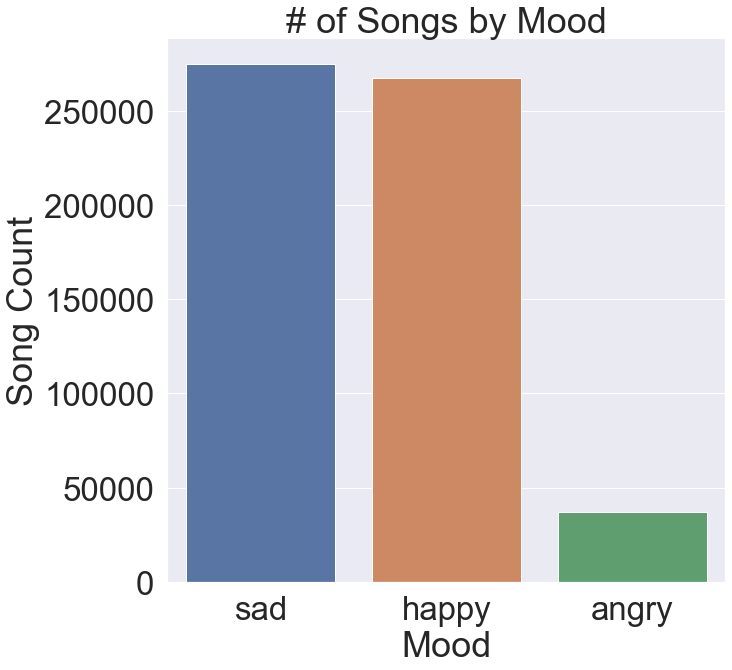

In [78]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=df['mood_preds'].value_counts().index, y=df['mood_preds'].value_counts().values);
ax.set_ylabel('Song Count')
ax.set_xlabel('Mood')
ax.set_title('# of Songs by Mood');

In [114]:
df[df.artists == 'Blake McGrath']

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_datetime,release_year,playlist_names,explicit_0.0,explicit_1.0,mode_0,mode_1,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_sig_0,time_sig_1,time_sig_3,time_sig_4,time_sig_5,mood_preds
